<a href="https://colab.research.google.com/github/sophiasagan/Computer_Vision/blob/main/SIgn_language_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import tensorflow as tf
import os 
import cv2 as cv2 


In [ ]:
dataset = r"C:\Users\USER\Downloads\MLI\Images\ASL_datasets"
Train_path  = r"C:\Users\USER\Downloads\MLI\Images\ASL_datasets\asl-alphabet-train"
Test_path = r"C:\Users\USER\Downloads\MLI\Images\ASL_datasets\asl-alphabet-test"

In [ ]:
dirls = os.listdir(Train_path)
print(dirls.__len__())
print(dirls)

val  = Train_path + '\\' +dirls[0]
print(val)


29
['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\USER\Downloads\MLI\Images\ASL_datasets\asl-alphabet-train\A


In [ ]:
def loading_images(path):
    pathnames = []
    dir_list = os.listdir(path)
    unique_class = sorted(dir_list)
    for i in range(len(unique_class)):
        newpath = Train_path + "\\" + unique_class[i]
        pathnames.append(newpath)
    return(pathnames, unique_class)

In [ ]:
path, classes = loading_images(Train_path)

In [ ]:
print(path)
print(classes)

['C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\A', 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\B', 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\C', 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\D', 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\E', 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\F', 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\G', 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\H', 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\I', 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\J', 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\K', 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\L', 'C:\\Users\\USER\\Downloads\\MLI\\Image

In [ ]:
print(classes.__len__())

29


In [ ]:
def labeling_images(unique_paths, unique_classes):
    img_path = []
    label = []
    for path, Label in zip(unique_paths, unique_classes):
        dir_list = os.listdir(path)
        for i in dir_list:
            img_dir_list = path + "\\" + i
            img_path.append(img_dir_list)
            label.append(Label)
    return(img_path, label)
        

In [ ]:
img_path , labels = labeling_images(path, classes)

In [ ]:
img_path.__len__()

870

In [ ]:
labels.__len__()

870

In [ ]:
img_path[0:5]

['C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\A\\A0001_test.jpg',
 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\A\\A0002_test.jpg',
 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\A\\A0003_test.jpg',
 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\A\\A0004_test.jpg',
 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\A\\A0005_test.jpg']

In [ ]:
labels[0:5]

['A', 'A', 'A', 'A', 'A']

In [ ]:
labels.__len__()

870

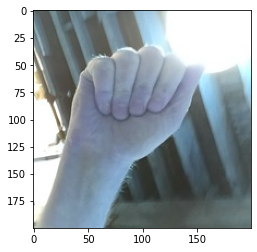

In [ ]:
img = cv2.imread(img_path[0])
plt.imshow(img)

In [ ]:
def image_array(paths):
    arr_list = []
    for i in paths:
        img = cv2.resize(cv2.imread(i), (64,64))
        arr_list.append(img)
    return(arr_list)

<class 'numpy.ndarray'>


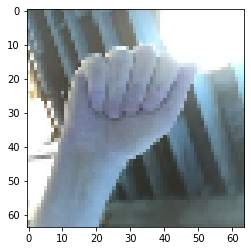

In [ ]:
labels = np.array(labels)
arr_img = image_array(img_path)
arr_img = np.array(arr_img)
print(type(arr_img[0]))
plt.imshow(arr_img[0])

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,  GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(arr_img, labels, test_size = 0.2)

train_n = len(X_train)
test_n = len(X_test)
print("Number of Training Images", train_n)
print("Number of testing images", test_n)
print(X_train.shape, Y_train.shape)

Number of Training Images 696
Number of testing images 174
(696, 64, 64, 3) (696,)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
vals = OneHotEncoder()
unq_labels = np.unique(Y_train)
print(unq_labels.__len__())
y_train_labels = vals.fit_transform(Y_train.reshape(-1,1)).toarray()
y_test_labels = vals.fit_transform(Y_test.reshape(-1,1)).toarray()


29


In [ ]:
y_train_labels.__len__()

696

In [ ]:
y_train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [ ]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=5, padding='same', activation='relu', input_shape=(64,64,3)))
model.add(Conv2D(filters=64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=5, padding='same', activation ='relu'))
model.add(Conv2D(filters=128, kernel_size=5, padding='same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=256, kernel_size=5, padding='same', activation ='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(29, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 64)        4864      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       409728    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer= Adam(lr=0.01), metrics=['accuracy'])
hist = model.fit(X_train, y_train_labels, batch_size=32, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/5
16/16 - 25s - loss: 1913.7075 - accuracy: 0.0226 - val_loss: 3.3851 - val_accuracy: 0.0335
Epoch 2/5
16/16 - 24s - loss: 3.3801 - accuracy: 0.0390 - val_loss: 3.3746 - val_accuracy: 0.0287
Epoch 3/5
16/16 - 23s - loss: 3.3651 - accuracy: 0.0329 - val_loss: 3.3758 - val_accuracy: 0.0239
Epoch 4/5
16/16 - 25s - loss: 3.3640 - accuracy: 0.0246 - val_loss: 3.3787 - val_accuracy: 0.0287
Epoch 5/5
16/16 - 25s - loss: 3.3624 - accuracy: 0.0246 - val_loss: 3.3814 - val_accuracy: 0.0287


In [ ]:
vals = model.predict(X_test[0])